In [1]:
from extract_feats import extract_all_features

c:\Users\max00\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightkurve\prf\__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


In [ ]:
data = extract_all_features("Kepler-447", "Kepler")

RemoteServiceError: The transaction was terminated because of the availability replica config/state change or because ghost records are being deleted on the primary and the secondary availability replica that might be needed by queries running under snapshot isolation. Retry the transaction.

In [3]:
data

OrderedDict([('period_days', 2.2049145386973263),
             ('t0', 231.5944487300992),
             ('duration_days', 0.146),
             ('duration_hours', 3.5039999999999996),
             ('scale_mean', -0.25867077658732734),
             ('scale_std', 1.0),
             ('scale_skewness', -3.4564143112458616),
             ('scale_kurtosis', 10.376542400908075),
             ('scale_outlier_resistance', 0.0),
             ('local_noise', 0.00016473917583456862),
             ('depth_stability', 0.013302204944349227),
             ('acf_lag_1h', 0.7314375423667493),
             ('acf_lag_3h', 0.047453803130225396),
             ('acf_lag_6h', -0.0687751138762978),
             ('acf_lag_12h', -0.06090436536560986),
             ('acf_lag_24h', -0.06381560164784131),
             ('cadence_hours', 0.016346198797691613),
             ('depth_mean_per_transit', 0.007003788167435419),
             ('depth_std_per_transit', 7.864874675430054e-05),
             ('npts_transit_median'

In [ ]:
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np
from transitleastsquares import transitleastsquares 
import matplotlib.pyplot as plt

lc = lk.search_lightcurve("Kepler-186f", mission="Kepler")
lc = lc.download_all()
lc = lc.stitch()
lc = lc.remove_nans().normalize().remove_outliers(sigma=5.0)

model = transitleastsquares(lc.time.value, lc.flux.value)
results = model.power(oversampling_factor=5) 

plt.figure(figsize=(10, 6))
plt.plot(results.periods, results.power, 'k-')
plt.title("Espectro de Potência - Kepler-186f")
plt.xlabel("Período (dias)")
plt.ylabel("Potência")
plt.grid(True)
plt.show()

Transit Least Squares TLS 1.32 (5 Apr 2024)
Creating model cache for 66 durations
Searching 1132089 data points, 310803 periods from 0.602 to 729.749 days
Using all 8 CPU threads


  0%|          | 464/310803 periods | 18:26<186:16:06

c:\Users\max00\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightkurve\search.py:420: LightkurveWarning: Warning: 69 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Transit Least Squares TLS 1.32 (5 Apr 2024)
Creating model cache for 38 durations
Searching 38271 data points, 2469 periods from 0.601 to 13.547 days
Using all 8 CPU threads


100%|██████████| 2469/2469 periods | 02:55<00:00


Searching for best T0 for period 2.20459 days


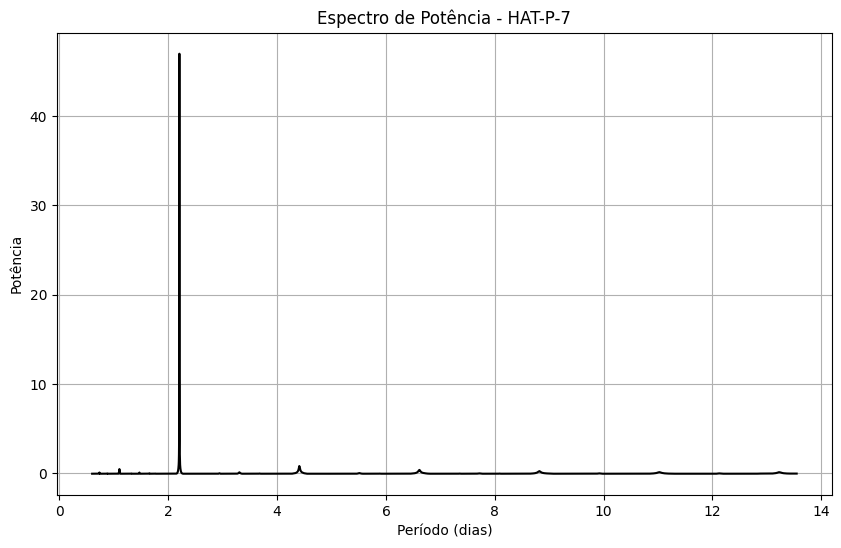

In [ ]:
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np
from transitleastsquares import transitleastsquares 
import matplotlib.pyplot as plt

lc = lk.search_lightcurve("HAT-P-7", mission="Kepler").download()
lc = lc.remove_nans().normalize().remove_outliers(sigma=5.0)

model = transitleastsquares(lc.time.value, lc.flux.value)
results = model.power()

plt.figure(figsize=(10, 6))
plt.plot(results.periods, results.power, 'k-')
plt.title("Espectro de Potência - HAT-P-7")
plt.xlabel("Período (dias)")
plt.ylabel("Potência")
plt.grid(True)
plt.show()

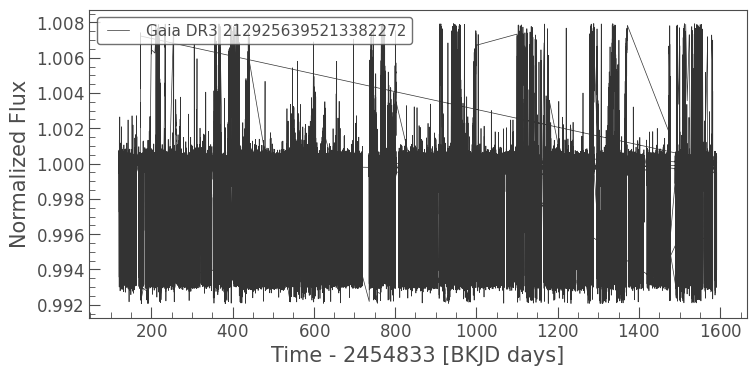

In [ ]:
lc.plot()
plt.show()

In [6]:
import lightkurve as lk
lc = lk.search_lightcurve("Kepler-10b", mission="Kepler").download()

c:\Users\max00\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightkurve\search.py:420: LightkurveWarning: Warning: 50 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


NameError: name 'plt' is not defined

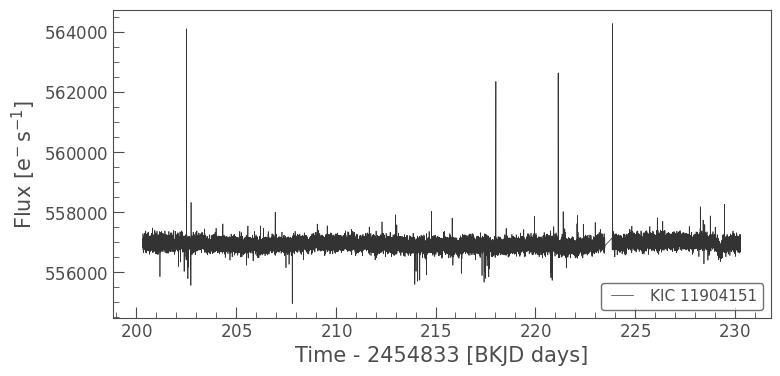

In [7]:
lc.plot()
plt.show()

c:\Users\max00\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightkurve\search.py:420: LightkurveWarning: Warning: 69 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


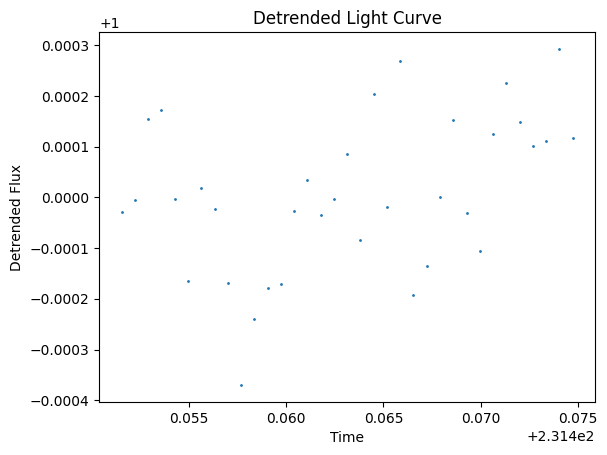

In [29]:
import matplotlib.pyplot as plt
from detrend_and_period import detrend_with_bls_mask

lc = lk.search_lightcurve("HAT-P-7", mission="Kepler").download()
lc = lc.remove_nans().normalize().remove_outliers(sigma=5.0)

flux_detr_full, trend_full, mask_transit, bls_info = detrend_with_bls_mask(lc.time.value, lc.flux.value)

# Ensure lc.time and flux_detr_full are 1D arrays of the same length
if lc.time.shape != flux_detr_full.shape:
	raise ValueError("lc.time and flux_detr_full must have the same shape.")

start, end = 100, 135  # Define the range to cut
plt.scatter(lc.time.value[start:end], flux_detr_full[start:end], s=1)  # Use .value to ensure compatibility
plt.xlabel("Time")
plt.ylabel("Detrended Flux")
plt.title("Detrended Light Curve")
plt.show()

c:\Users\max00\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightkurve\search.py:420: LightkurveWarning: Warning: 44 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


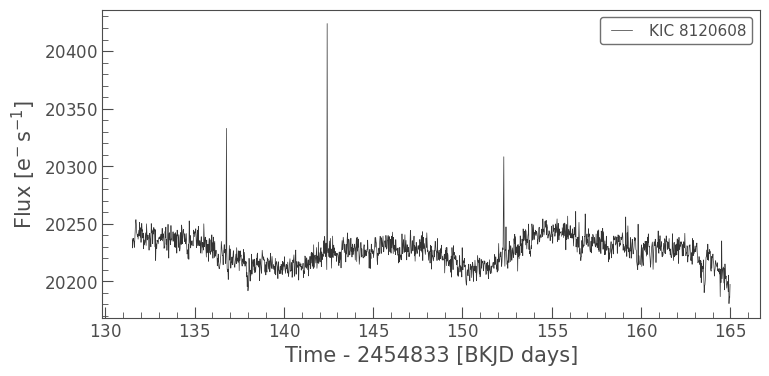

In [15]:
lc = lk.search_lightcurve("Kepler-186", mission="Kepler").download()
lc.plot()
plt.show()

c:\Users\max00\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightkurve\search.py:420: LightkurveWarning: Warning: 62 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


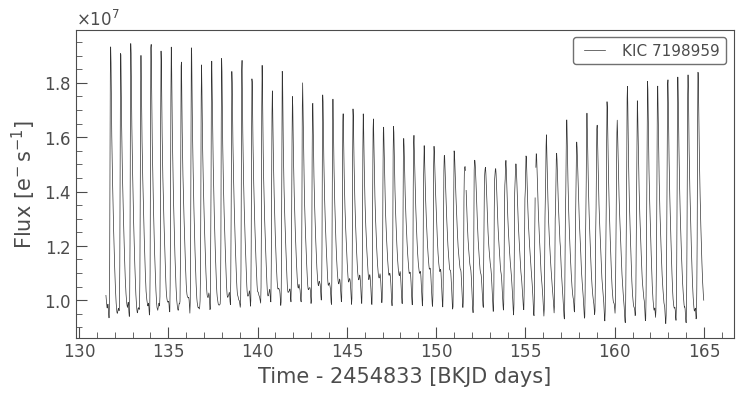

In [18]:
lc = lk.search_lightcurve("RR Lyrae", mission="Kepler").download()
lc.plot()
plt.show()

SearchResult containing 50 data products.

 #       mission      year   author   exptime         target_name          distance
                                         s                                  arcsec 
--- ----------------- ---- ---------- ------- ---------------------------- --------
  0 Kepler Quarter 02 2009     Kepler      60                kplr011904151      0.0
  1 Kepler Quarter 03 2009     Kepler      60                kplr011904151      0.0
  2 Kepler Quarter 03 2009     Kepler      60                kplr011904151      0.0
  3 Kepler Quarter 03 2009     Kepler      60                kplr011904151      0.0
  4 Kepler Quarter 00 2009     Kepler    1800                kplr011904151      0.0
  5 Kepler Quarter 01 2009     Kepler    1800                kplr011904151      0.0
  6 Kepler Quarter 02 2009     Kepler    1800                kplr011904151      0.0
  7 Kepler Quarter 03 2009     Kepler    1800                kplr011904151      0.0
  8 Kepler Quarter 07 2010     Ke

c:\Users\max00\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightkurve\search.py:420: LightkurveWarning: Warning: 50 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


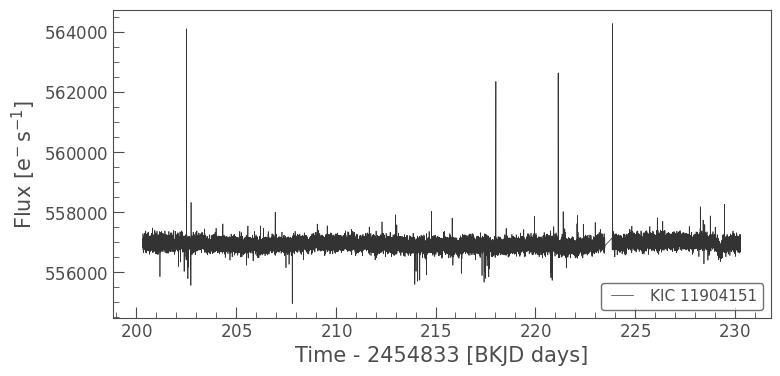

In [ ]:
search = lk.search_lightcurve("Kepler-10", mission="Kepler")
print(search) 

lc = search.download()
lc.plot()
plt.show()